# Bayesian Multilevel Modelling using PyStan

This is a tutorial, following through Chris Fonnesbeck's [primer on using PyStan with Bayesian Multilevel Modelling](http://mc-stan.org/documentation/case-studies/radon.html).

# 6. Comparison of Pooled and Unpooled Models

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import pystan
import seaborn as sns

import clean_data
import pooled_model
import unpooled_model

sns.set_context('notebook')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


The pooled and unpooled radon estimate models that were previously defined in `04-pooled_model.ipynb` and `05-unpooled_model.ipynb` are redefined and run in the `pooled_model` and `unpooled_model` modules, imported above. This makes the variables defined in earlier notebooks available here also, for comparison and plotting.

## Plot comparison of pooled and unpooled estimates

We can make direct visual comparisons between pooled and unpooled estimates for all counties, but here we do so for a specific subset:

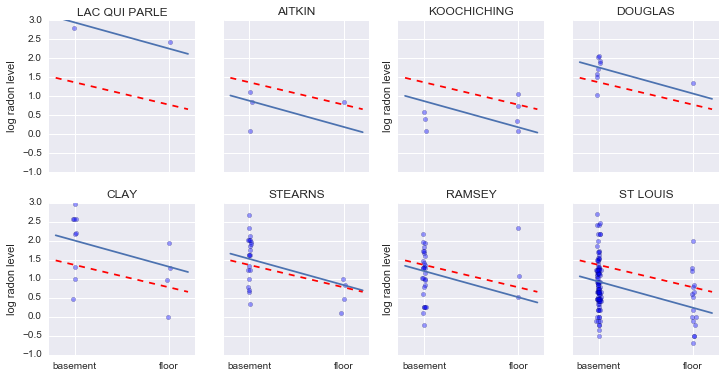

In [2]:
# Define subset of counties
sample_counties = ('LAC QUI PARLE', 'AITKIN', 'KOOCHICHING',
                   'DOUGLAS', 'CLAY', 'STEARNS', 'RAMSEY',
                   'ST LOUIS')

# Make plot
fig, axes = plt.subplots(2, 4, figsize=(12, 6),
                         sharex=True, sharey=True)
axes = axes.ravel()  # turn axes into a flattened array
m = unpooled_model.unpooled_fit['beta'].mean(0)
for i, c in enumerate(sample_counties):
    # Get unpooled estimates and set common x values
    b = unpooled_model.unpooled_estimates[c]
    xvals = np.linspace(-0.2, 1.2)
    
    # Plot household data
    x = clean_data.srrs_mn.floor[clean_data.srrs_mn.county == c]
    y = clean_data.srrs_mn.log_radon[clean_data.srrs_mn.county == c]
    axes[i].scatter(x + np.random.randn(len(x)) * 0.01, y, alpha=0.4)
    
    # Plot models
    axes[i].plot(xvals, m * xvals + b)  # unpooled
    axes[i].plot(xvals, pooled_model.m0 * xvals + pooled_model.b0, 'r--')  # pooled
    
    # Add labels and ticks
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['basement', 'floor'])
    axes[i].set_ylim(-1, 3)
    axes[i].set_title(c)
    if not i % 2:
        axes[i].set_ylabel('log radon level')

By visual inspection, we can see that using unpooled county estimates for prevailing radon level has resulted in models that deviate from the pooled estimates, correcting for its *bias*. However, we can also see that for counties with few observations, the fitted estimates track the observations very closely, suggesting that there has been *overfitting*. The attempt to minimise error due to *bias* has resulted in the introduction of greater error due to *variance* in the dataset.

## Conclusion

Neither model does perfectly:

* For identification of counties with a predicted prevailing high radon level, pooling is useless (because all counties are modelled with the same level)
* However, we ought not to trust any unpooled estimates that were produced using few observations on a county

Ideally, we would have an intermediate form of model that optimally minimises the errors due to both *bias* and *variance*.